<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>NUMERIEK BEPALEN VAN DE NULPUNTEN VAN EEN FUNCTIE</h1>
        <h2>De bissectiemethode</h2>
    </font>
</div>

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div>
    <font color=#690027 markdown="1">
        <h2>1. Inleiding</h2> 
    </font>
</div>

In Python kan je een functievoorschrift ingeven m.b.v. het sleutelwoord `lambda`, op de manier die je ziet in de volgende code-cellen.

In [2]:
f = lambda x: x**2 - 2               # f staat voor de functie die x afbeeldt op x²-2

In [3]:
f(3)

7

In [4]:
x = np.arange(-7, 7, 0.1)            # NumPy-lijst van originelen aanmaken 
y = f(x)                             # NumPy-lijst van overeenkomstige beelden aanmaken   
print("x", x)
print("y", y)

x [-7.00000000e+00 -6.90000000e+00 -6.80000000e+00 -6.70000000e+00
 -6.60000000e+00 -6.50000000e+00 -6.40000000e+00 -6.30000000e+00
 -6.20000000e+00 -6.10000000e+00 -6.00000000e+00 -5.90000000e+00
 -5.80000000e+00 -5.70000000e+00 -5.60000000e+00 -5.50000000e+00
 -5.40000000e+00 -5.30000000e+00 -5.20000000e+00 -5.10000000e+00
 -5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.000

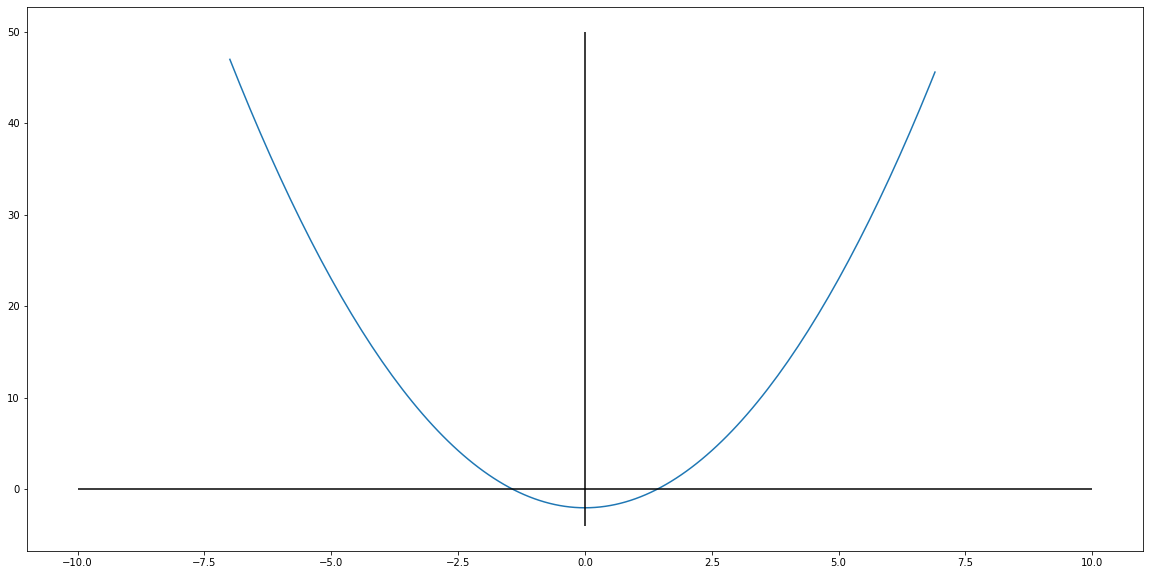

In [5]:
# grafiek
plt.figure(figsize=(20,10))

plt.plot(x,y)

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

De grafiek van f heeft twee snijpunten met de x-as. De nulwaarden zijn $\sqrt2$ en $-\sqrt2$. 

In [6]:
np.sqrt(2)

1.4142135623730951

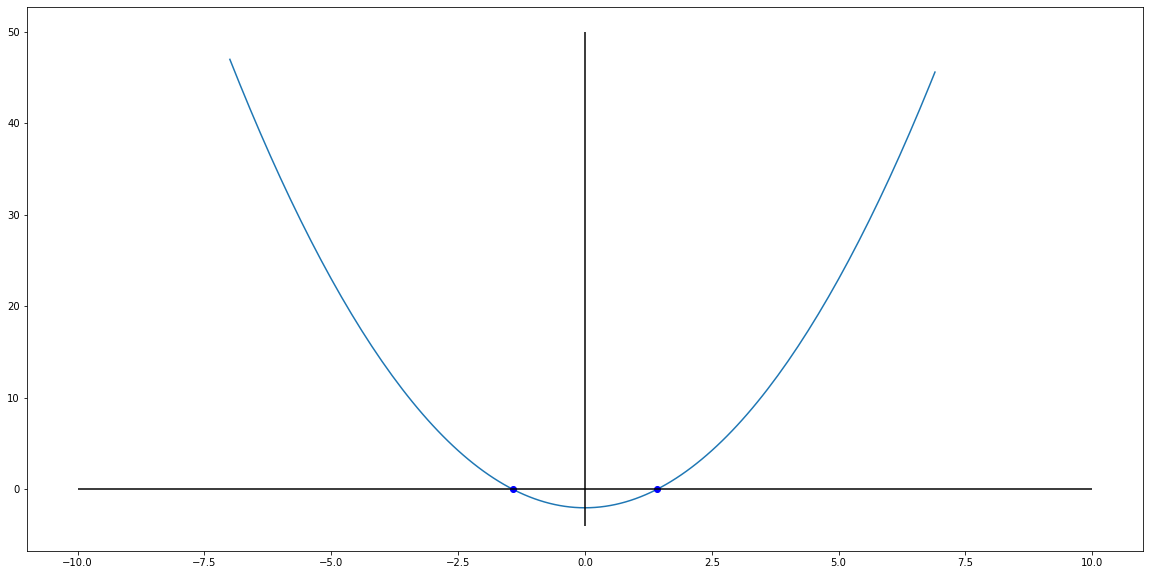

In [7]:
# grafiek met nulwaarden aangeduid
plt.figure(figsize=(20,10))

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

Met de bissectiemethode kan je deze nulpunten bepalen door ze geleidelijk aan te benaderen.

<div>
    <font color=#690027 markdown="1">
        <h2>2. Bissectie</h2> 
    </font>
</div>

Eerst definieer je de functie bissectie. Deze functie vraagt als parameters de functie waarop en het interval waarover je de methode wilt toepassen. <br>
Het interval moet overeenkomen met twee punten op de grafiek; daarbij moet het ene punt boven de x-as en het andere punt onder de x-as liggen. Omdat de functie continu is, zal de grafiek de x-as snijden in een waarde die in het interval ligt. 

In [8]:
# bissectie
def bissectie(f, a, b): 
    """Benadert een nulwaarde van de functie f tussen x-waarden a en b a.d.h.v. het gemiddelde van a en b."""
    
    # controleer of a en b punten op grafiek bepalen aan weerszijden van x-as
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("De punten liggen niet aan weerszijden van de x-as.")
        
    # gemiddelde berekenen
    m = (a + b)/2
    return m

Je zal m.b.v. deze functie de nulwaarde $\sqrt 2$ benaderen.

In [9]:
np.sqrt(2)

1.4142135623730951

In [10]:
# bissctie toepassen over het interval [0,2]
m1 = bissectie(f, 0, 2)                  # f(0)<0 en f(2)>0 dus nulwaarde in [0,2]

punt = (m1, f(m1))
print(punt)

(1.0, -1.0)


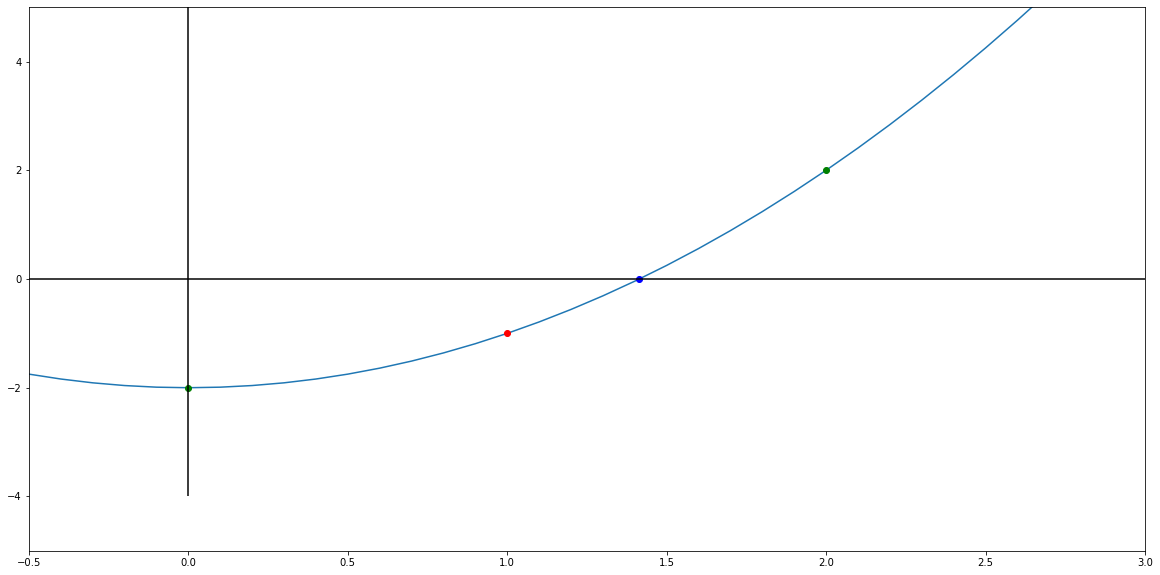

In [11]:
# illustratie
plt.figure(figsize=(20,10))

plt.axis(xmin=-0.5, xmax=3, ymin=-5, ymax= 5)

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.plot(0, f(0), marker="o", color="green")         # grens
plt.plot(2, f(2),  marker="o", color="green")        # grens

m1 = bissectie(f, 0, 2)                       # bisscectie toepassen
plt.plot(m1, f(m1), marker="o", color="red")

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

De functie `bissectie()` zal herhaaldelijk worden uitgevoerd, in principe totdat je het bekomen resultaat nauwkeurig genoeg vindt.

<div>
    <font color=#690027 markdown="1">
        <h2>3. Bissectie herhaaldelijk toepassen</h2> 
    </font>
</div>

Je herhaalt `bissectie` dus enkele keren; daarbij pas je het interval steeds aan. 

Na deze eerste stap, gebruik je het rechtse groene punt opnieuw, maar het linkse vervang je door het rode punt. 

Het interval waarover je de methode toepast, wordt steeds smaller en bevat steeds de nulwaarde die je zoekt.

### Eerste herhaling

In [12]:
# bissctie toepassen over het interval [1,2]
m2 = bissectie(f, 1, 2)

punt = (m2, f(m2))
print(punt)

(1.5, 0.25)


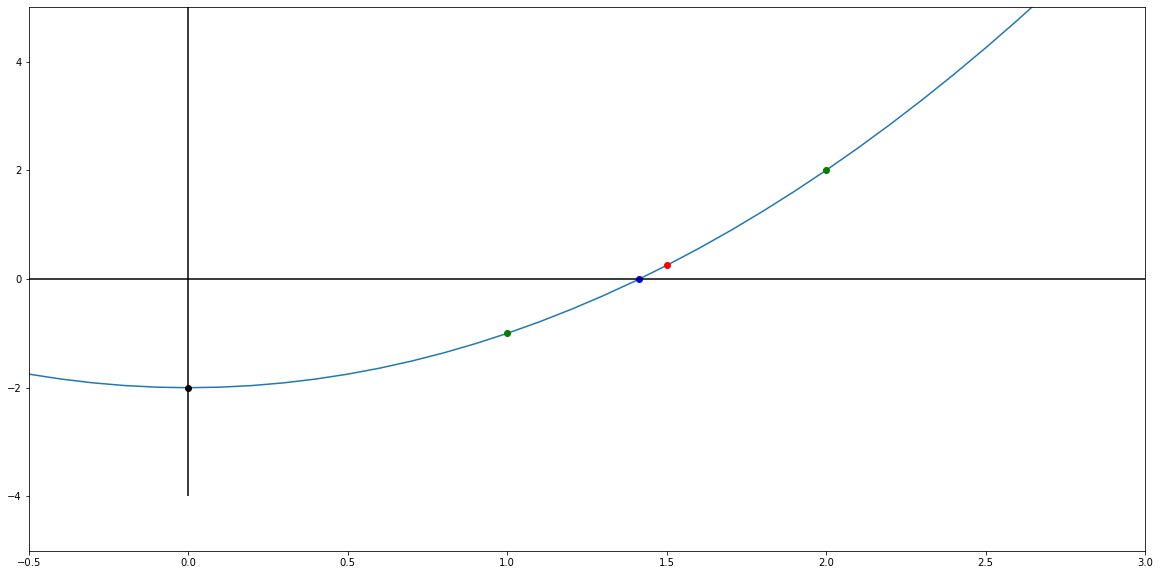

In [13]:
# illustratie
plt.figure(figsize=(20,10))

plt.axis(xmin=-0.5, xmax=3, ymin=-5, ymax= 5)

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.plot(0, f(0), marker="o", color="black")         # grens
plt.plot(2, f(2),  marker="o", color="green")        # grens


m1 = bissectie(f, 0, 2)
plt.plot(m1, f(m1),  marker="o", color="green")

m2 = bissectie(f, 1, 2)
plt.plot(m2, f(m2),  marker="o", color="red")

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

### Tweede herhaling

Voor deze stap vervang je het bovenste groene punt door het rode. 

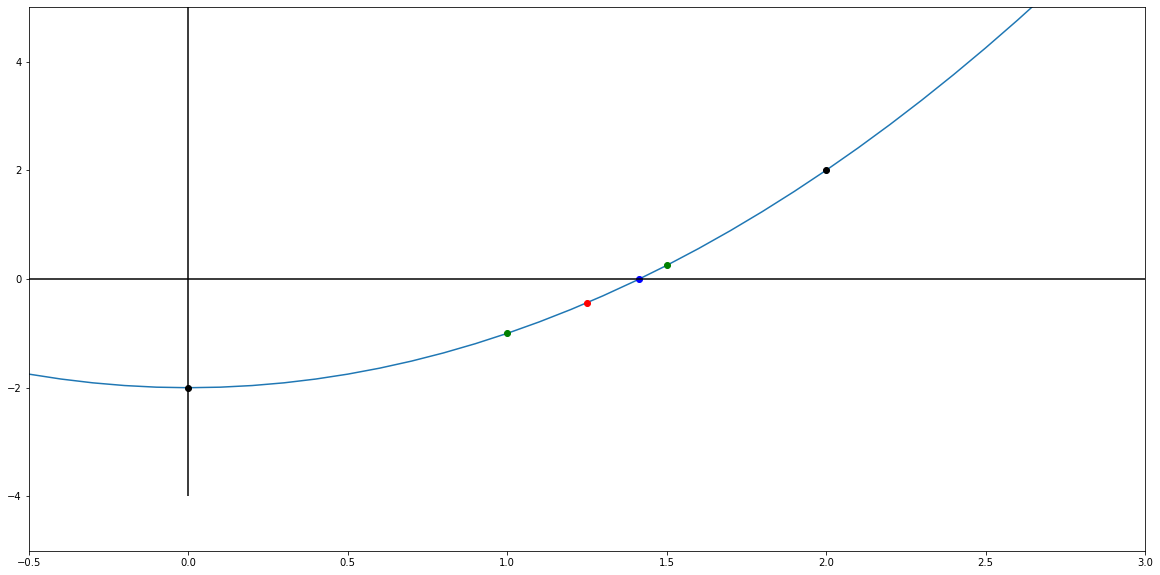

In [14]:
# illustratie
plt.figure(figsize=(20,10))

plt.axis(xmin=-0.5, xmax=3, ymin=-5, ymax= 5)

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.plot(0, f(0), marker="o", color="black")         # grens
plt.plot(2, f(2),  marker="o", color="black")        # grens

m1 = bissectie(f, 0, 2)
plt.plot(m1, f(m1), marker="o", color="green")

m2 = bissectie(f, 1, 2)
plt.plot(m2, f(m2), marker="o", color="green")

m3 = bissectie(f, 1, 1.5)
plt.plot(m3, f(m3), marker="o", color="red")

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

In [15]:
(m3, f(m3))

(1.25, -0.4375)

### Opdracht 3.1 
Ga verder met herhalen totdat je 6 keer herhaald hebt, m.a.w. tot `m7`.

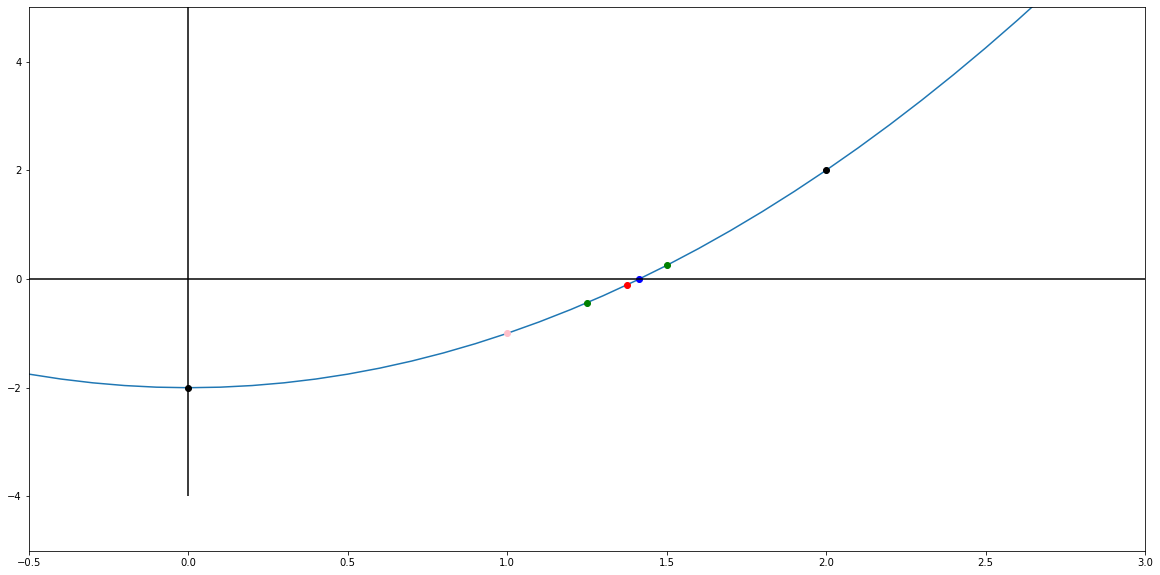

In [16]:
# voorbeeldcode
# illustratie
plt.figure(figsize=(20,10))

plt.axis(xmin=-0.5, xmax=3, ymin=-5, ymax= 5)

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.plot(0, f(0), marker="o", color="black")         # grens
plt.plot(2, f(2),  marker="o", color="black")        # grens

m1 = bissectie(f, 0, 2)
plt.plot(m1, f(m1), marker="o", color="pink")

m2 = bissectie(f, 1, 2)
plt.plot(m2, f(m2), marker="o", color="green")

m3 = bissectie(f, 1, 1.5)
plt.plot(m3, f(m3), marker="o", color="green")

m4 = bissectie(f, 1.25, 1.5)
plt.plot(m4, f(m4), marker="o", color="red")

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

In [17]:
# voorbeeldcode
(m4, f(m4))

(1.375, -0.109375)

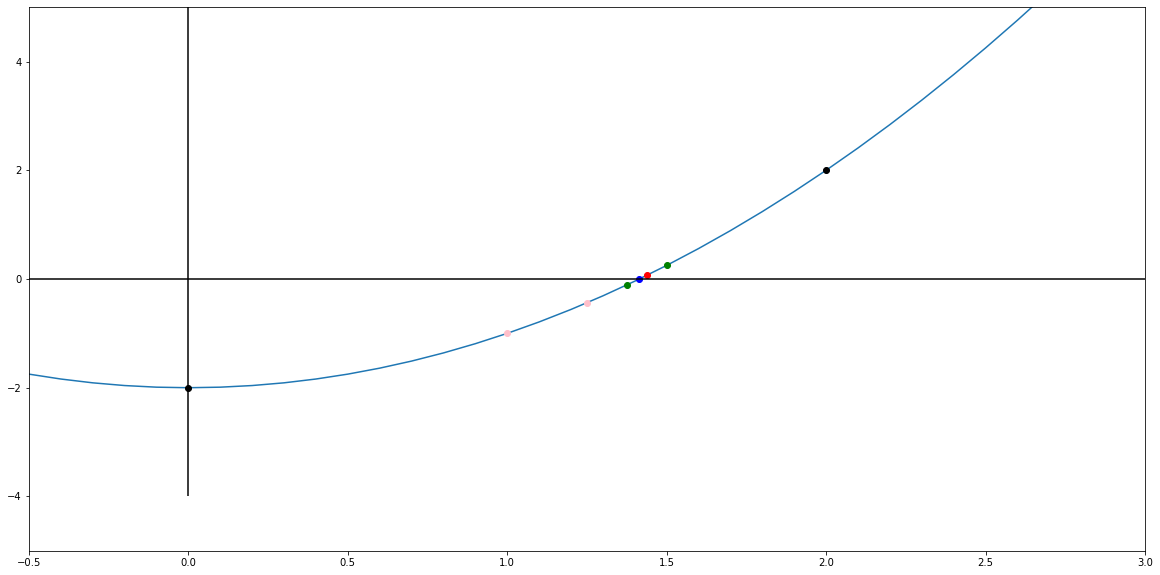

In [18]:
# voorbeeldcode
# illustratie
plt.figure(figsize=(20,10))

plt.axis(xmin=-0.5, xmax=3, ymin=-5, ymax= 5)

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.plot(0, f(0), marker="o", color="black")         # grens
plt.plot(2, f(2),  marker="o", color="black")        # grens

m1 = bissectie(f, 0, 2)
plt.plot(m1, f(m1), marker="o", color="pink")

m2 = bissectie(f, 1, 2)
plt.plot(m2, f(m2), marker="o", color="green")

m3 = bissectie(f, 1, 1.5)
plt.plot(m3, f(m3), marker="o", color="pink")

m4 = bissectie(f, 1.25, 1.5)
plt.plot(m4, f(m4), marker="o", color="green")

m5 = bissectie(f, 1.375, 1.5)
plt.plot(m5, f(m5), marker="o", color="red")

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

In [19]:
# voorbeeldcode
(m5, f(m5))

(1.4375, 0.06640625)

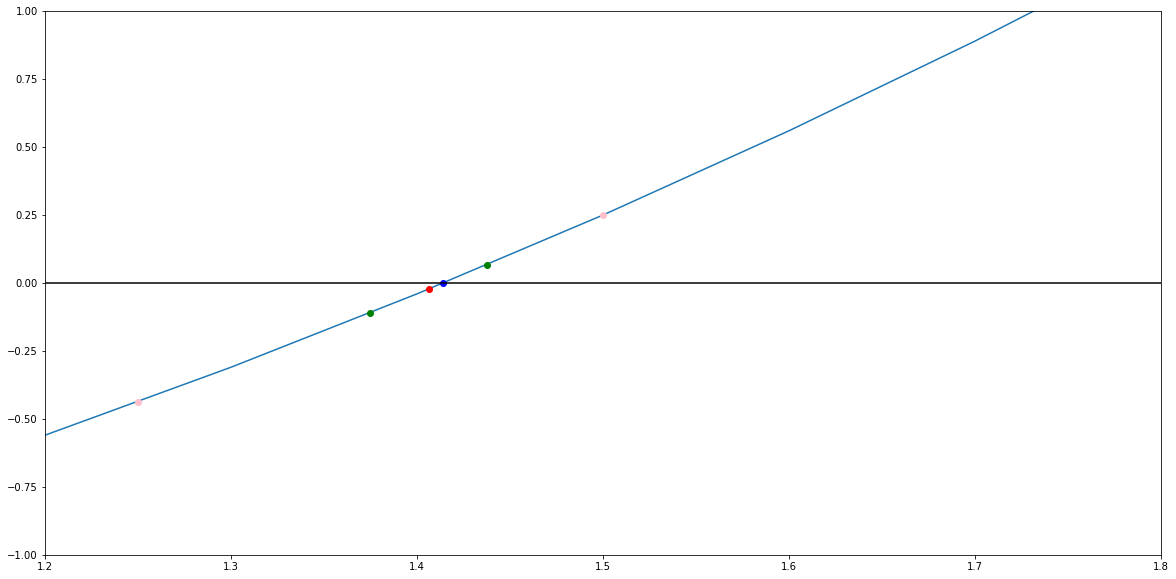

In [20]:
# voorbeeldcode
# illustratie
plt.figure(figsize=(20,10))

plt.axis(xmin=1.2, xmax=1.8, ymin=-1, ymax = 1)

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.plot(0, f(0), marker="o", color="black")         # grens
plt.plot(2, f(2),  marker="o", color="black")        # grens

m1 = bissectie(f, 0, 2)
plt.plot(m1, f(m1), marker="o", color="pink")

m2 = bissectie(f, 1, 2)
plt.plot(m2, f(m2), marker="o", color="pink")

m3 = bissectie(f, 1, 1.5)
plt.plot(m3, f(m3), marker="o", color="pink")

m4 = bissectie(f, 1.25, 1.5)
plt.plot(m4, f(m4), marker="o", color="green")

m5 = bissectie(f, 1.375, 1.5)
plt.plot(m5, f(m5), marker="o", color="green")

m6 = bissectie(f, 1.375, 1.4375)
plt.plot(m6, f(m6), marker="o", color="red")

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

In [21]:
# voorbeeldcode
(m6, f(m6))

(1.40625, -0.0224609375)

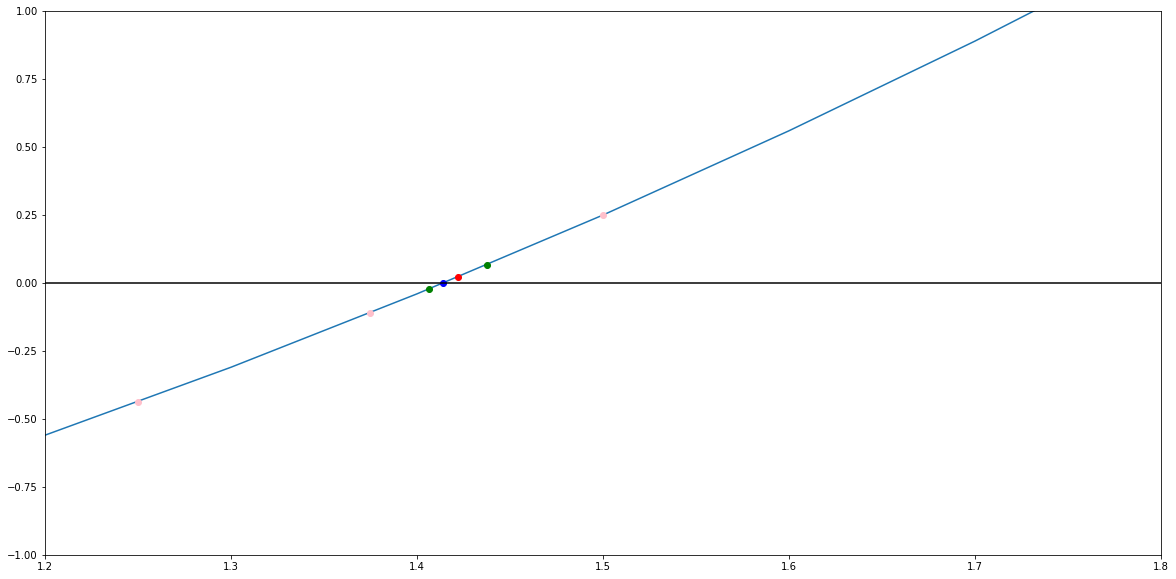

In [22]:
# voorbeeldcode
# illustratie
plt.figure(figsize=(20,10))

plt.axis(xmin=1.2, xmax=1.8, ymin=-1, ymax = 1)

plt.plot(x,y)
plt.plot(np.sqrt(2), f(np.sqrt(2)), marker="o", color="blue")
plt.plot(-np.sqrt(2), -f(np.sqrt(2)), marker="o", color="blue")

plt.plot(0, f(0), marker="o", color="black")         # grens
plt.plot(2, f(2),  marker="o", color="black")        # grens

m1 = bissectie(f, 0, 2)
plt.plot(m1, f(m1), marker="o", color="pink")

m2 = bissectie(f, 1, 2)
plt.plot(m2, f(m2), marker="o", color="pink")

m3 = bissectie(f, 1, 1.5)
plt.plot(m3, f(m3), marker="o", color="pink")

m4 = bissectie(f, 1.25, 1.5)
plt.plot(m4, f(m4), marker="o", color="pink")

m5 = bissectie(f, 1.375, 1.5)
plt.plot(m5, f(m5), marker="o", color="green")

m6 = bissectie(f, 1.375, 1.4375)
plt.plot(m6, f(m6), marker="o", color="green")

m7 = bissectie(f, 1.40625, 1.4375)
plt.plot(m7, f(m7), marker="o", color="red")

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

In [23]:
# voorbeeldcode
(m7, f(m7))

(1.421875, 0.021728515625)

### Antwoord
1,421875 is een benadering voor $\sqrt 2$.<br>
De beeldwaarde wijkt met iets meer dan 0,02 af van 0. 

<div>b
    <font color=#690027 markdown="1">
        <h2>4. Recursie (facultatief)</h2> 
    </font>
</div>

In het vorige puntje heb je telkens dezelfde handelingen moeten herhalen. Het zou dus handig zijn om die handeling te automatiseren. Dat kan je doen a.d.h.v. *recursie*.

De code zou moeten aangeven dat de functie `bissectie()` herhaaldelijk moet worden toegepast, maar op zo'n manier dat het resultaat van de functie `bissectie()` gebruikt wordt bij de volgende toepassing van de functie. De code zal er dus ook moeten voor zorgen dat het interval op de juiste manier wordt aangepast. <br>
Bovendien mag de herhaling niet blijven voortduren; de code moet ook aangeven wanneer de nulwaarde voldoende dicht benaderd is. Men spreekt van een *tolerantie*, de mate waarin het beeld mag afwijken van 0. 

In [24]:
def bissectie_recursief(f, a, b, tol): 
    """Benadert een nulwaarde van de functie f tussen x-waarden a en b a.d.h.v. het gemiddelde van a en b, tot de tolerantie bereikt is."""
    # tolerantie is bereikt als de benadering voldoet aan |f(m)| < tol, met m het gemiddelde van a en b 
    # recursie met aanpassing van [a,b]
    
    # controleer of a en b punten op grafiek bepalen aan weerszijden van x-as
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("De punten liggen niet aan weerszijden van de x-as.")
        
    # gemiddelde berekenen
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stop recursie, m is gewenste beandering van nulwaarde
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # interval moet aangepast worden naar [m, b] 
        # roep functie opnieuw op met a = m
        return bissectie_recursief(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # interval moet aangepast worden naar [a, m] 
        # roep functie opnieuw op met b = m
        return bissectie_recursief(f, a, m, tol)

Pas de recursie toe op de functie *f* van hierboven.

In [25]:
r_1 = bissectie_recursief(f, 0, 2, 0.1)      # f(0)<0 en f(2)>0 dus nulwaarde in [0,2]
print("nulwaarde met tolerantie 0,1 is r_1 =", r_1)                    
print("f(r_1) =", f(r_1))

nulwaarde met tolerantie 0,1 is r_1 = 1.4375
f(r_1) = 0.06640625


De meegegeven tolerantie is 0,1. De beeldwaarde 0,06640625 is inderdaad kleiner dan 0,1. Dus 1,4375 wordt aanvaard als benadering voor $\sqrt2$.

### Opdracht 4.1
Pas de recursie toe, maar met een tolerantie van 0,01. 

In [26]:
# voorbeeldcode
r_01 = bissectie_recursief(f, 0, 2, 0.01)
print("nulwaarde met tolerantie 0,01 is r_01 =", r_01)
print("f(r_01) =", f(r_01))

nulwaarde met tolerantie 0,01 is r_01 = 1.4140625
f(r_01) = -0.00042724609375


### Opdracht 4.2
-  Welke tolerantie moet je gebruiken om ongeveer dezelfde benadering te vinden als `m7` in puntje 3.  
-  Test de gekozen tolerantie uit. 

In [27]:
# voorbeeldcode
r_022 = bissectie_recursief(f, 0, 2, 0.022)
print("nulwaarde met tolerantie 0,022 is r_022 =", r_022)
print("f(r_022) =", f(r_022))

nulwaarde met tolerantie 0,022 is r_022 = 1.421875
f(r_022) = 0.021728515625


<div>
    <font color=#690027 markdown="1">
        <h2>5. Oefeningen</h2> 
    </font>
</div>

### Opdracht 5.1

Benader het andere nulpunt van dezelfde functie *f*.

### Opdracht 5.2

Benader de nulpunten van een andere, zelf gekozen functie.

<div>
    <font color=#000000 markdown="1">
        <h2>Referentielijst</h2>
    </font>
</div>

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.03-Bisection-Method.html